# Visualization / Plotly

In [108]:
import pandas as pd
import plotly.express as px

In [109]:
pd.options.plotting.backend = "plotly"

In [110]:
df = pd.read_csv("../loan-clean.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,136.0,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            559 non-null    object 
 1   Gender             559 non-null    object 
 2   Married            559 non-null    object 
 3   Dependents         559 non-null    object 
 4   Education          559 non-null    object 
 5   Self_Employed      559 non-null    object 
 6   ApplicantIncome    559 non-null    int64  
 7   CoapplicantIncome  559 non-null    float64
 8   LoanAmount         559 non-null    float64
 9   Loan_Amount_Term   559 non-null    float64
 10  Credit_History     559 non-null    float64
 11  Property_Area      559 non-null    object 
 12  Loan_Status        559 non-null    object 
 13  Income             559 non-null    float64
dtypes: float64(5), int64(1), object(8)
memory usage: 61.3+ KB


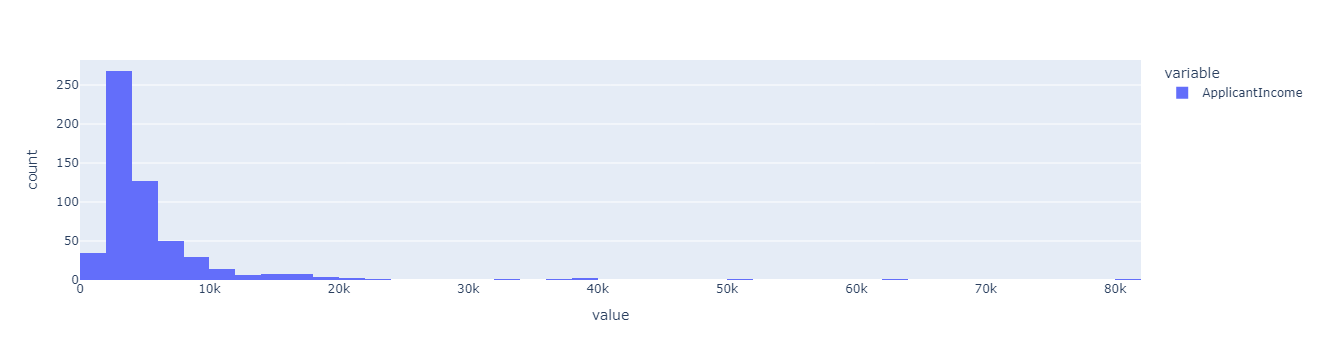

In [112]:
df["ApplicantIncome"].plot.hist(bins=100)

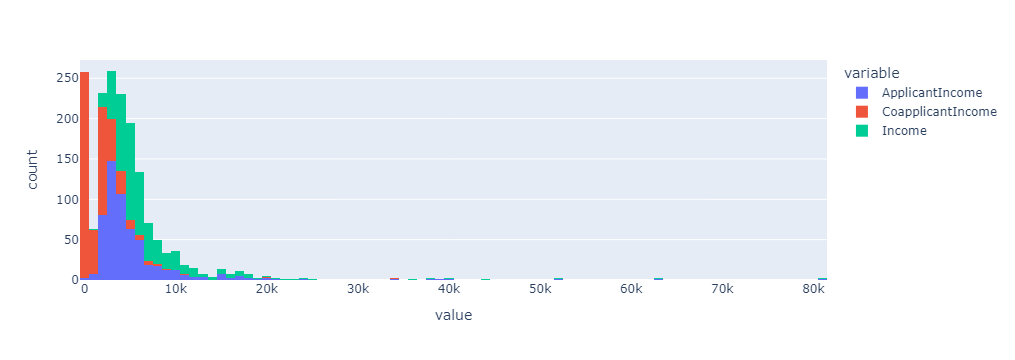

In [113]:
fig = px.histogram(df, x=["ApplicantIncome","CoapplicantIncome", "Income"])
fig.show()

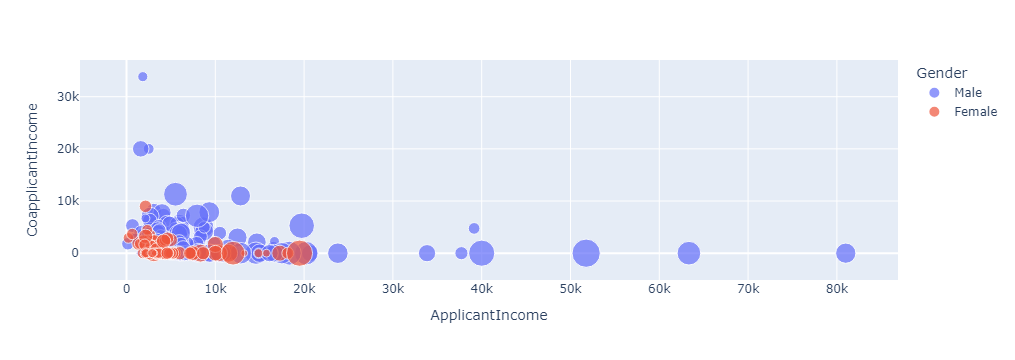

In [114]:
fig = px.scatter(df,
                 x="ApplicantIncome",
                 y="CoapplicantIncome",
                 color="Gender",
                 size="LoanAmount")
fig.show()

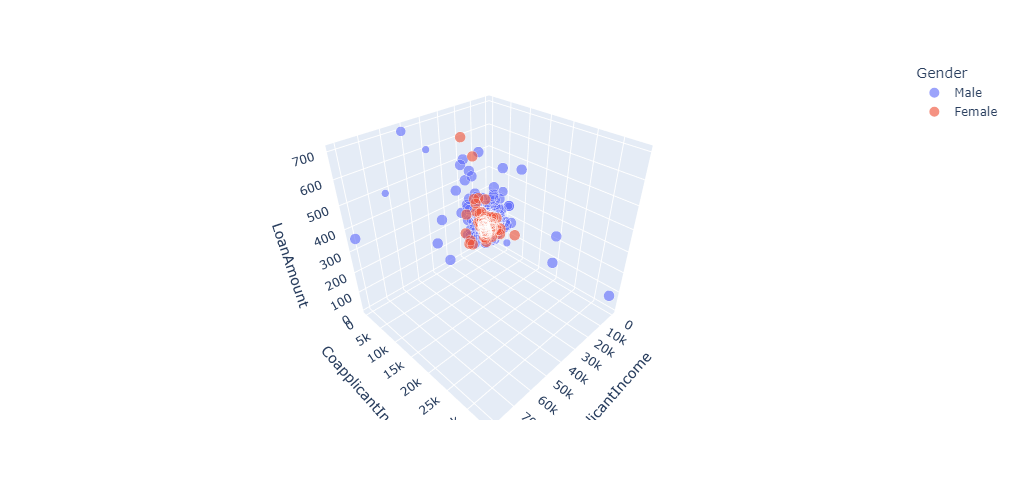

In [120]:
fig = px.scatter_3d(df,
                    x="ApplicantIncome",
                    y="CoapplicantIncome",
                    z="LoanAmount",
                    color="Gender",
                    size="Loan_Amount_Term",
                    height=500)
fig.update_traces(opacity=0.9)
fig.show()

In [66]:
df = pd.read_csv("../titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


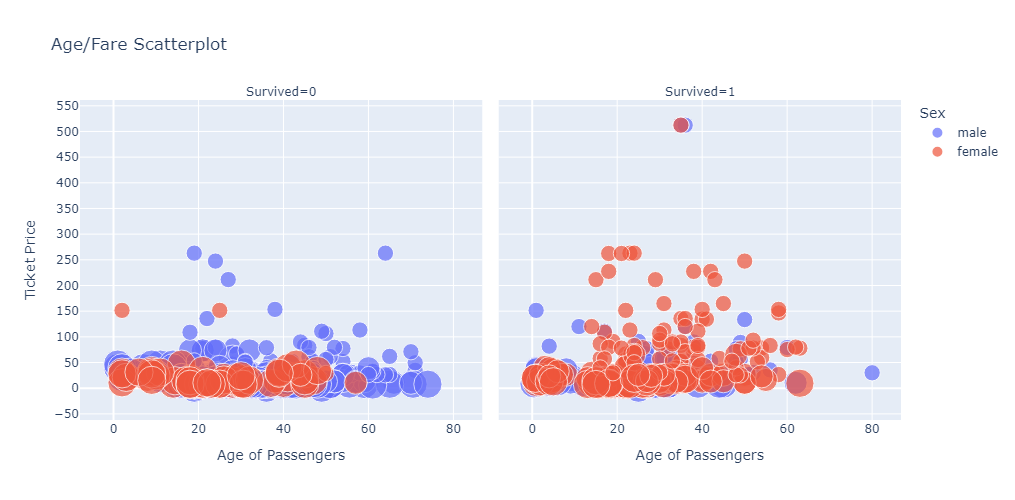

In [67]:
fig = px.scatter(df,
                 x="Age",
                 y="Fare",
                 color="Sex",
                 size="Pclass",
                 facet_col="Survived",
                 title="Age/Fare Scatterplot",
                 labels={"Age": "Age of Passengers",
                         "Fare": "Ticket Price"},
                height=500)
fig.update_yaxes(tick0=0, dtick=50)
fig.show()

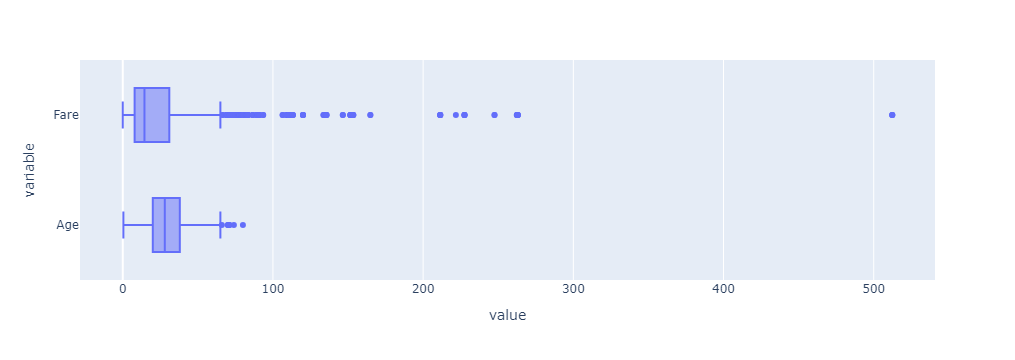

In [68]:
fig = px.box(df, x=["Age", "Fare"])
fig.show()

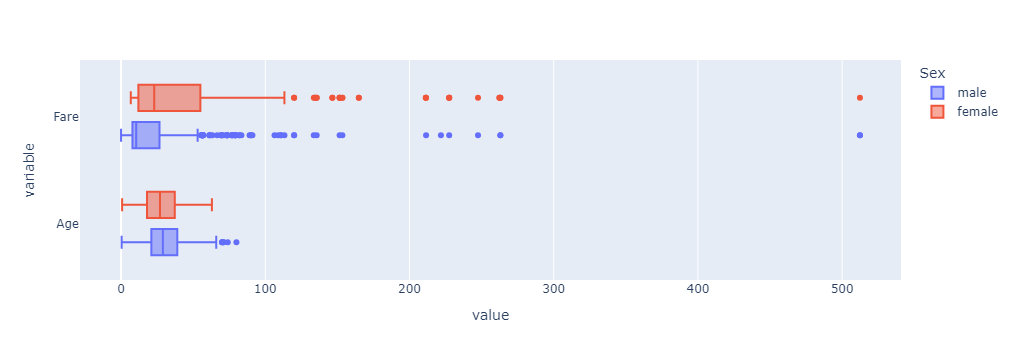

In [69]:
fig = px.box(df, x=["Age", "Fare"], color="Sex", hover_name="Name", hover_data=["Survived", "Pclass"])
fig.show()

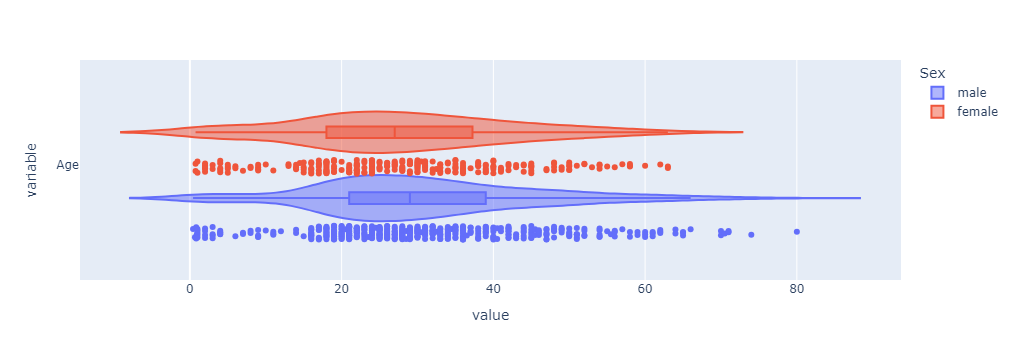

In [75]:
fig = px.violin(df, x=["Age"], color="Sex",
                hover_name="Name", hover_data=["Survived", "Pclass"],
                box=True,
                points="all")
fig.show()

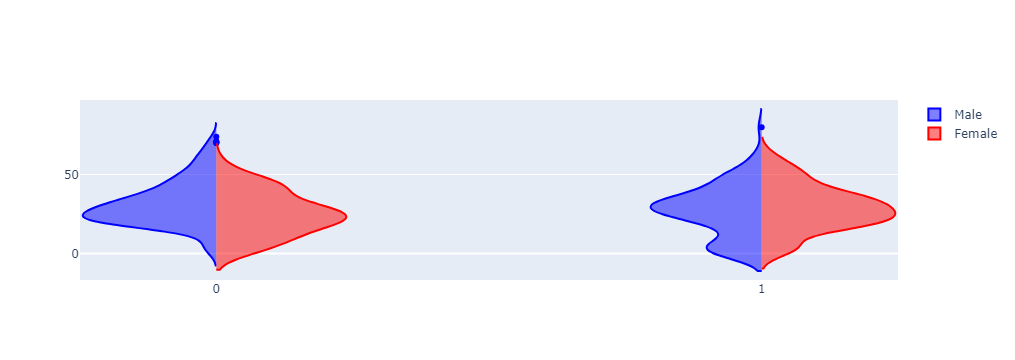

In [93]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Violin(x=df["Survived"][df["Sex"] == "male"],
                        y=df["Age"][df["Sex"] == "male"],
                        side="negative",
                        name="Male",
                        line_color="blue"))

fig.add_trace(go.Violin(x=df["Survived"][df["Sex"] == "female"],
                        y=df["Age"][df["Sex"] == "female"],
                        side="positive",
                        name="Female",
                        line_color="red"))

fig.show()

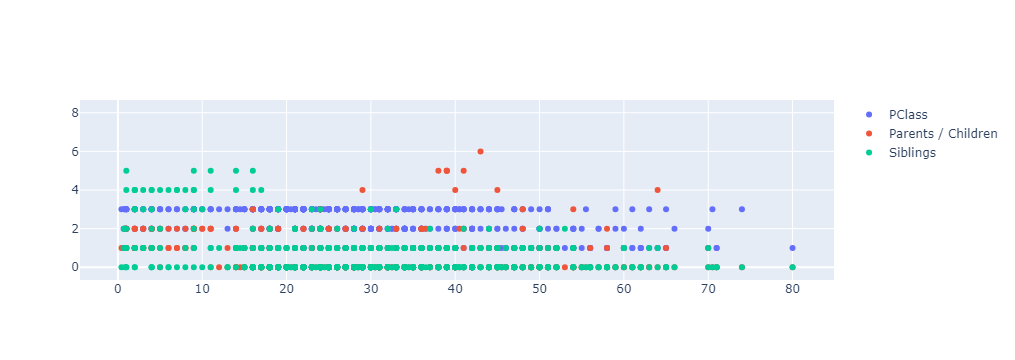

In [106]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(x=df["Age"],
                        y=df["Pclass"],
                        mode='markers',
                        name="PClass"))

fig.add_trace(go.Scatter(x=df["Age"],
                        y=df["Parch"],
                        mode='markers',
                        name="Parents / Children"))

fig.add_trace(go.Scatter(x=df["Age"],
                        y=df["SibSp"],
                        mode='markers',
                        name="Siblings"))
fig.show()

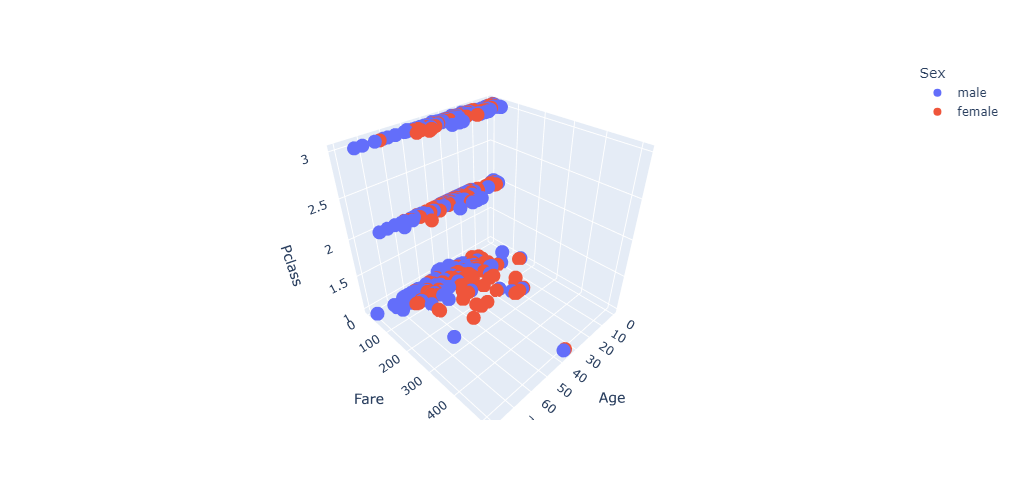

In [107]:
fig = px.scatter_3d(df,
                    x="Age",
                    y="Fare",
                    z="Pclass",
                    color="Sex",
                    height=500)
fig.show()